In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="muted")


In [5]:
df = pd.read_csv("../data/processed/orders_cleaned.csv")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<Axes: ylabel='Description'>

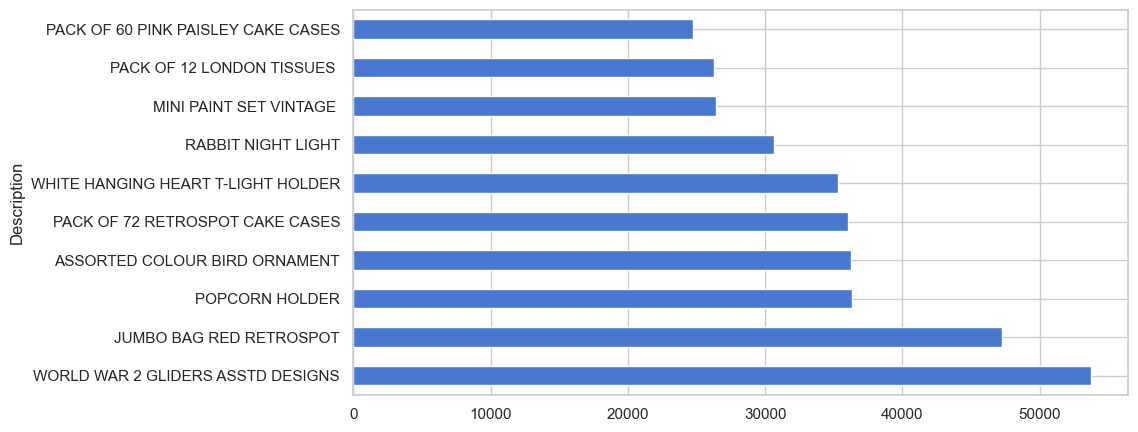

In [9]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,5))


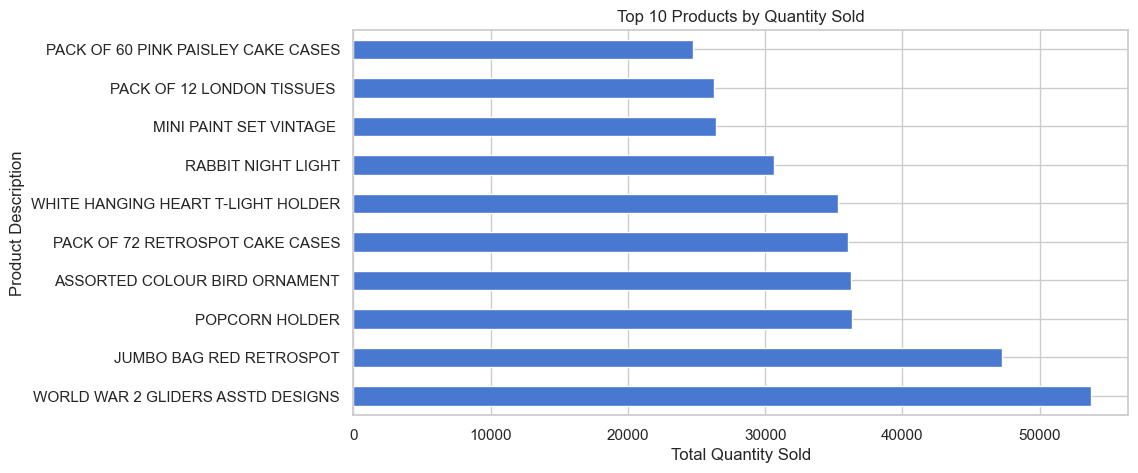

Insight: The chart shows which products are most frequently purchased. High-selling items indicate popular and fast-moving inventory.


In [10]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,5), title='Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

print("Insight: The chart shows which products are most frequently purchased. High-selling items indicate popular and fast-moving inventory.")


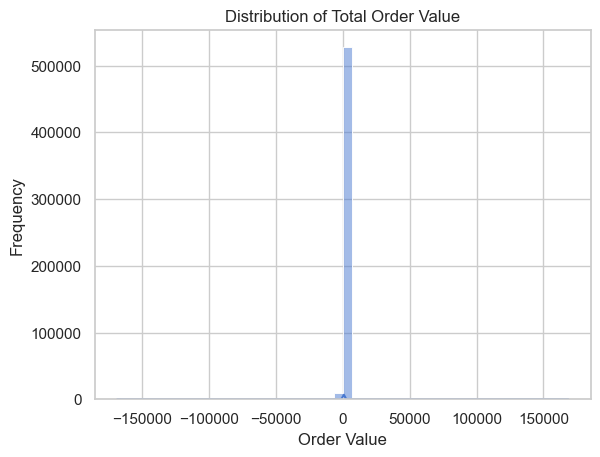

Insight: Most transactions fall under low order values, indicating many small purchases and fewer high-value orders.


In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

print("Insight: Most transactions fall under low order values, indicating many small purchases and fewer high-value orders.")


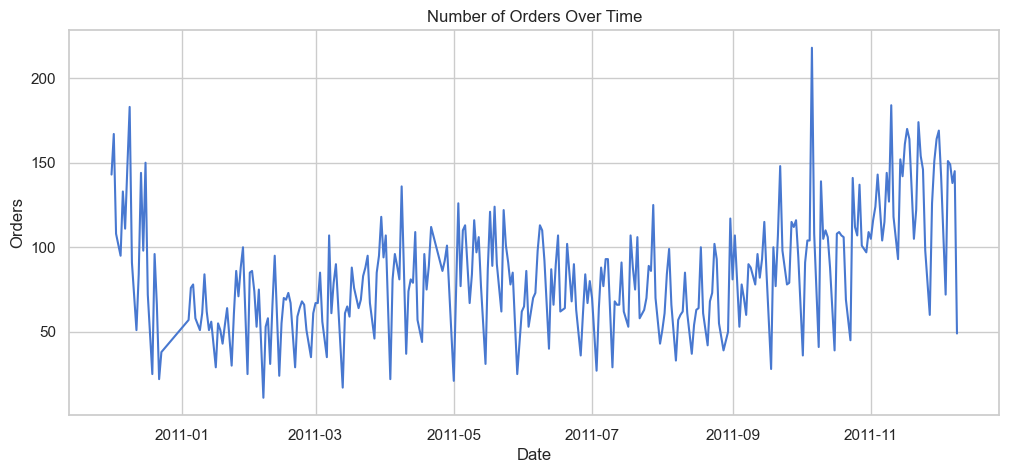

Insight: The order trend helps identify busy sales days or possible drops, useful for marketing or supply chain planning.


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
orders_per_day = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique()
orders_per_day.plot(figsize=(12,5), title='Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

print("Insight: The order trend helps identify busy sales days or possible drops, useful for marketing or supply chain planning.")


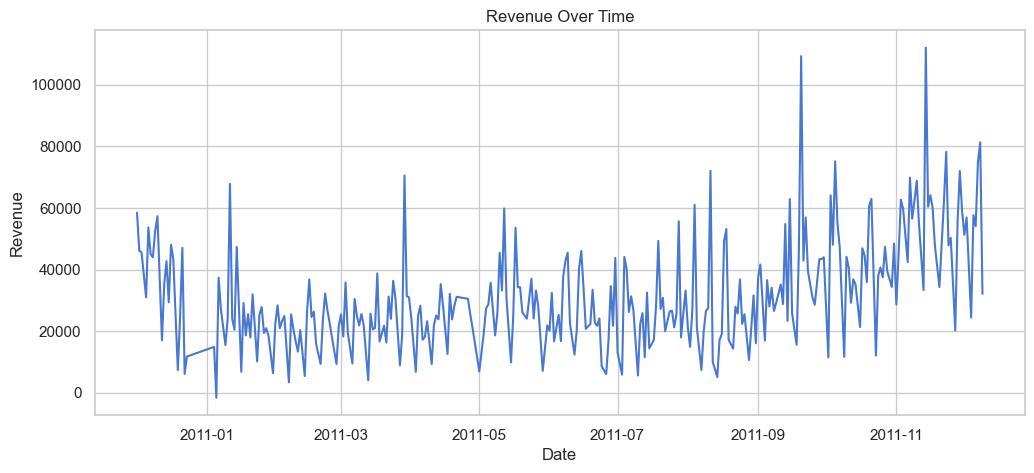

Insight: Revenue patterns show peak sales periods—could be due to promotions or seasonal demand.


In [13]:
revenue_per_day = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
revenue_per_day.plot(figsize=(12,5), title='Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

print("Insight: Revenue patterns show peak sales periods—could be due to promotions or seasonal demand.")


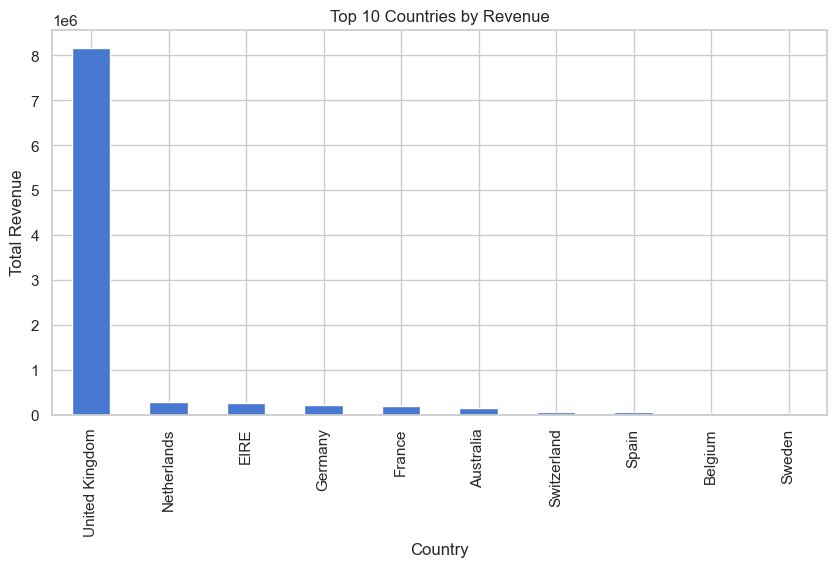

Insight: The UK often dominates revenue, reflecting it as the primary sales region in this dataset.


In [14]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

print("Insight: The UK often dominates revenue, reflecting it as the primary sales region in this dataset.")


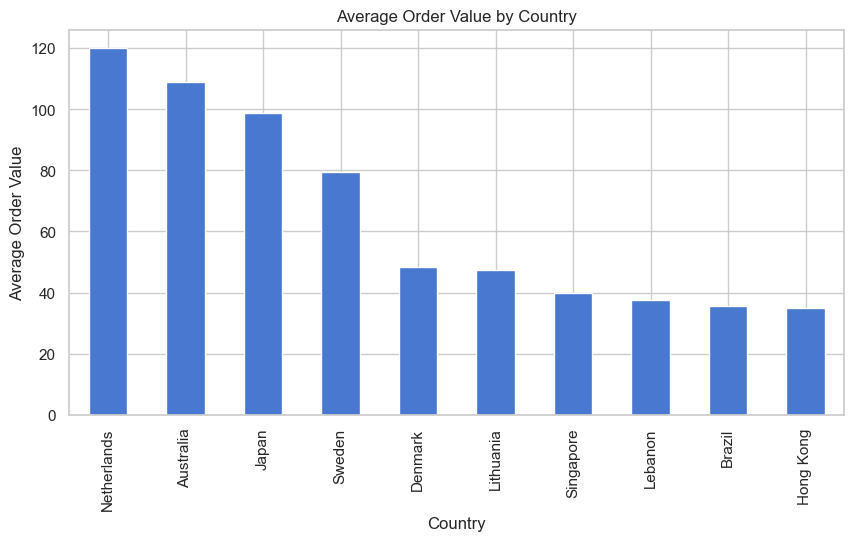

Insight: Certain countries have higher average order values, indicating potential premium buyers or larger bulk orders.


In [15]:
aov = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)
aov.plot(kind='bar', figsize=(10,5), title='Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.show()

print("Insight: Certain countries have higher average order values, indicating potential premium buyers or larger bulk orders.")


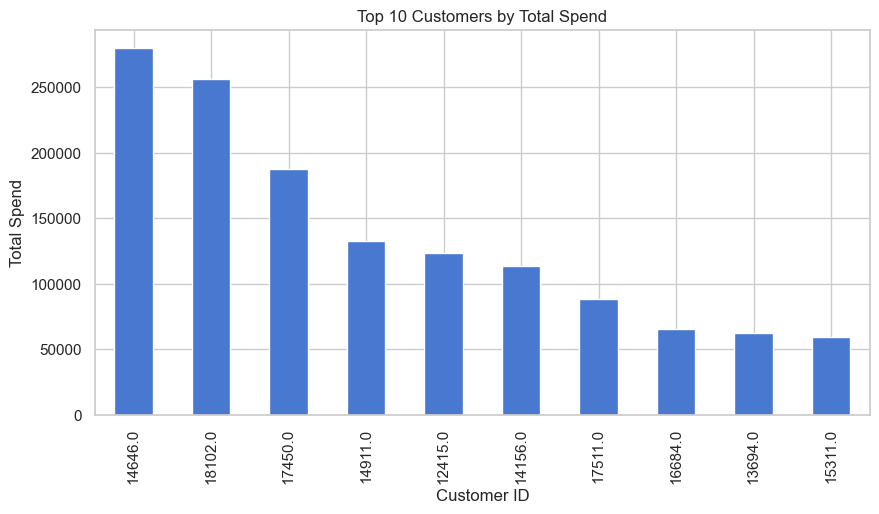

Insight: A small set of customers contributes a large portion of revenue—retaining them is crucial.


In [16]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), title='Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()

print("Insight: A small set of customers contributes a large portion of revenue—retaining them is crucial.")


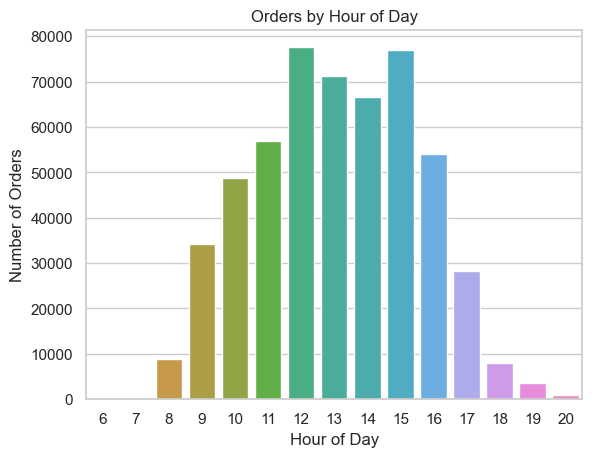

Insight: Orders peak during specific hours, likely reflecting online shopping behavior during work breaks or evenings.


In [17]:
df['hour'] = df['InvoiceDate'].dt.hour
sns.countplot(x='hour', data=df)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

print("Insight: Orders peak during specific hours, likely reflecting online shopping behavior during work breaks or evenings.")


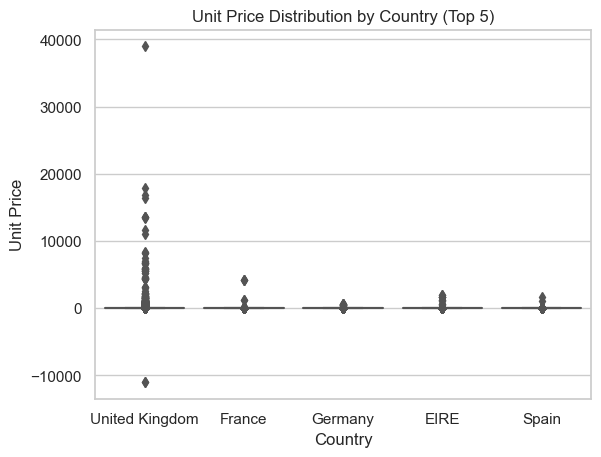

Insight: Price ranges differ across countries; outliers may indicate premium or bulk-priced products.


In [18]:
top_countries = df['Country'].value_counts().head(5).index
sns.boxplot(x='Country', y='UnitPrice', data=df[df['Country'].isin(top_countries)])
plt.title('Unit Price Distribution by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.show()

print("Insight: Price ranges differ across countries; outliers may indicate premium or bulk-priced products.")


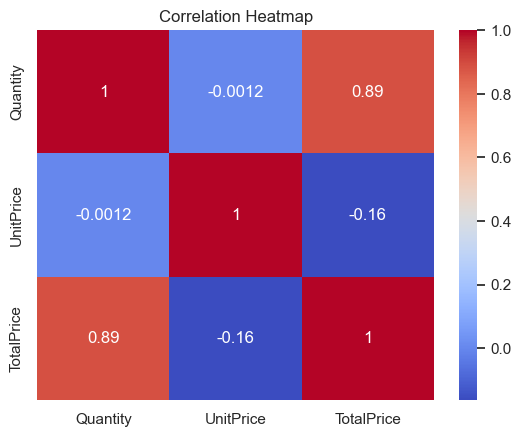

Insight: Quantity and Total Price show strong positive correlation, while Unit Price may have a weaker link—indicating volume-driven revenue.


In [21]:
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("Insight: Quantity and Total Price show strong positive correlation, while Unit Price may have a weaker link—indicating volume-driven revenue.")


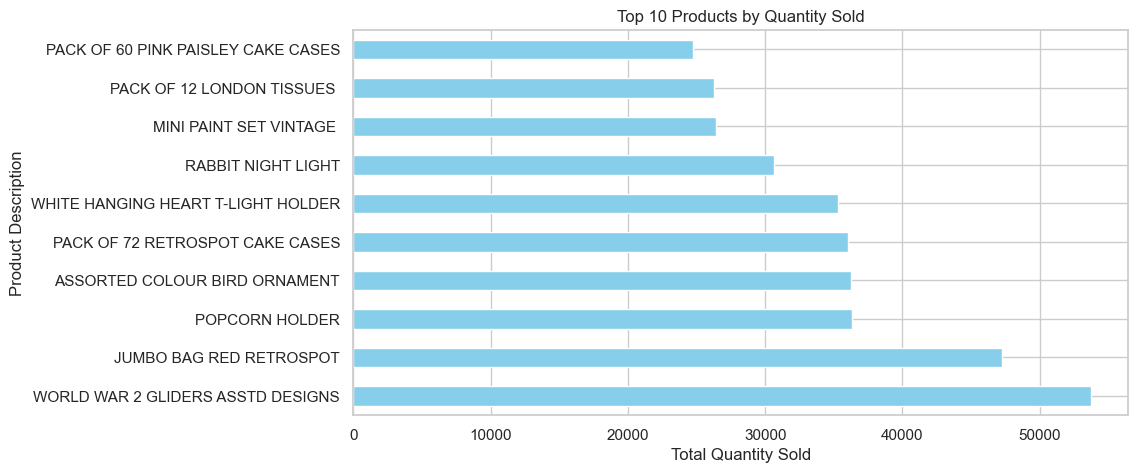

A small group of products accounts for a major share of total items sold.
These are likely fast-moving, low-value items that drive repeat orders and volume.


In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()
print("A small group of products accounts for a major share of total items sold.")
print("These are likely fast-moving, low-value items that drive repeat orders and volume.")

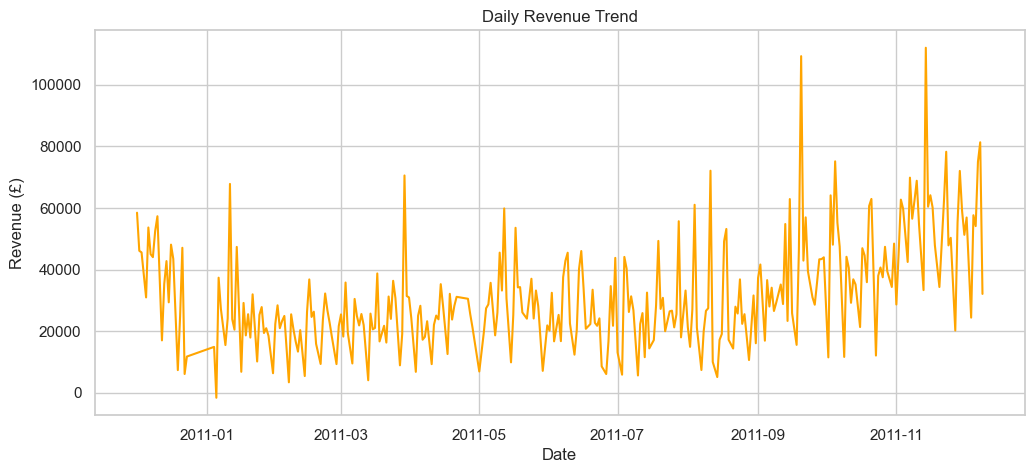

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

revenue_trend = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
revenue_trend.plot(figsize=(12,5), color='orange')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.show()


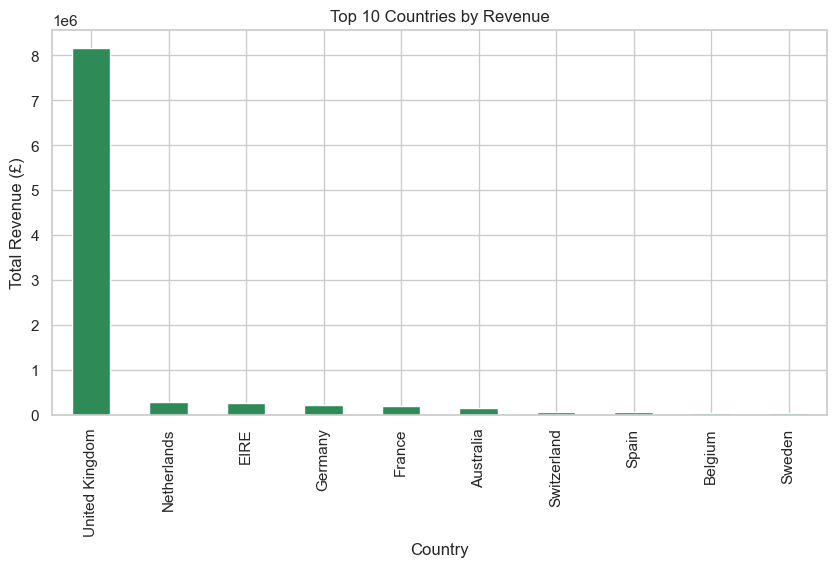

In [25]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10,5), color='seagreen')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue (£)')
plt.show()
